# Comparisons and analysis

This notebook is for getting the simulated data done on the cluster and then doing funky comparisons and analysis

In [1]:
# Model Comparisons

# Import SCorrs from folder

# Graph them Accordingly

# Compare FCMs to actual data.

In [50]:
# First Import the packages.
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from scipy import stats
matplotlib.style.use('ggplot')
import inspect
import os
import csv 
import time

import glob
# import pandas as pd

In [23]:
# Now Import our data from our data folder:

# Get all csv filenames in a folder
all_files = glob.glob("do-not-track/*.csv")
all_files

['do-not-track\\FCM_MouseExperimental.csv',
 'do-not-track\\MouseCortex_FCM_20200520-215237_.csv',
 'do-not-track\\MouseCortex_FCM_20200520-221355_.csv',
 'do-not-track\\MouseCortex_FCM_20200526-150651_.csv',
 'do-not-track\\MouseCortex_FCM_20200605-202643_.csv',
 'do-not-track\\MouseCortex_FCM_20200605-205134_.csv',
 'do-not-track\\MouseCortex_Params_20200520-214857_.csv',
 'do-not-track\\MouseCortex_Params_20200520-215237_.csv',
 'do-not-track\\MouseCortex_Params_20200520-221355_.csv',
 'do-not-track\\MouseCortex_Params_20200526-150651_.csv',
 'do-not-track\\MouseCortex_Params_20200605-202643_.csv',
 'do-not-track\\MouseCortex_Params_20200605-205134_.csv',
 'do-not-track\\MouseCortex_Scorr_20200520-215237_.csv',
 'do-not-track\\MouseCortex_Scorr_20200520-221355_.csv',
 'do-not-track\\MouseCortex_Scorr_20200526-150651_.csv',
 'do-not-track\\MouseCortex_Scorr_20200605-202643_.csv',
 'do-not-track\\MouseCortex_Scorr_20200605-205134_.csv',
 'do-not-track\\MouseCortex_Tseries_20200520-215

In [32]:
# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(all_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# Scorr of Simulation vs Experimental Mouse Data

SpearmanrResult(correlation=-0.026456572509204083, pvalue=0.48371016360888675)


Text(0.05, 0.95, 'SpearmanrResult(correlation=-0.026456572509204083, pvalue=0.48371016360888675)')

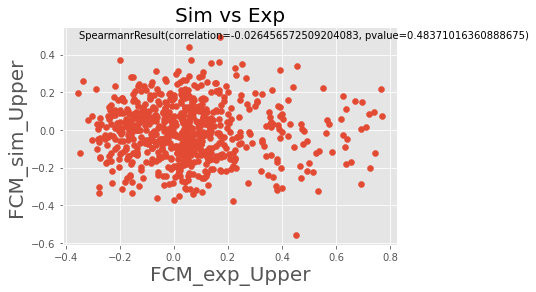

In [54]:
# Import Experimental Mouse Data FCM
FCM_exp = np.genfromtxt('do-not-track\\FCM_MouseExperimental.csv',delimiter = "\t")
# Simualted FCM
FCM_sim = np.genfromtxt(all_files[4],delimiter="\t")


# Comparing FC_experimental Vs FC_Simulation with Spearman Correlation

# Grab Upper triangles
FCM_exp_Upper = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
FCM_sim_Upper = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_exp_Upper,b=FCM_sim_Upper)
print(SCorr)

# Scatterplot
plt.scatter(FCM_exp_Upper,FCM_sim_Upper)
plt.xlabel('FCM_exp_Upper', fontsize=20)
plt.ylabel('FCM_sim_Upper', fontsize=20)
plt.title('Sim vs Exp', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')